In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import adam_v2
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [2]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)->(60000,28,28,1),最后一维为深度，黑白为1，彩色为3
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
# 换one hot格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)


In [3]:
# 定义顺序模型
model = Sequential()

# 第一个卷积层
# input_shape 输入平面
# filters 卷积核/滤波器个数
# kernel_size 卷积窗口大小
# strides 步长
# padding padding方式 same/valid
# activation 激活函数
model.add(Convolution2D(
    input_shape = (28,28,1),
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation = 'relu',
    name = 'conv1'
))
# 第一个池化层
model.add(MaxPooling2D(
    pool_size = 2,
    strides = 2,
    padding = 'same',
    name = 'pool1'
))
# 第二个卷积层
model.add(Convolution2D(64,5,strides=1,padding='same',activation='relu',name='conv2'))
# 第二个池化层
model.add(MaxPooling2D(2,2,'same',name='pool2'))
# 把第二个池化层的输出扁平化为1维
model.add(Flatten())
# 第一个全连接层
model.add(Dense(1024,activation='relu'))
# Dropout
model.add(Dropout(0.5))
# 第二个全连接层
model.add(Dense(10,activation='softmax'))

In [4]:
# 定义优化器
adam = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# 定义优化器,loss function,训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
# 训练模型
model.fit(x_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 6s 3ms/step - loss: 0.1259 - accuracy: 0.9611
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0426 - accuracy: 0.9872
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0298 - accuracy: 0.9910
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0232 - accuracy: 0.9927: 0s - loss: 0.0237 - accuracy: 
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0144 - accuracy: 0.9951
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0109 - accuracy: 0.9964
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 10/10
938/938 [==============================] - 3s 3ms/step -

In [6]:
# 评估模型
loss,accuracy = model.evaluate(x_test,y_test)

print('test loss',loss)
print('test accuracy',accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0246 - accuracy: 0.9932
test loss 0.024558858945965767
test accuracy 0.9932000041007996


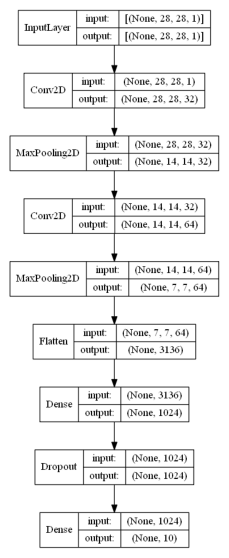

In [7]:
plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread("model.png")
plt.imshow(img)
plt.axis('off')
plt.show()